<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from ydata_profiling import ProfileReport

RANDOM_STATE = 42
random.seed(42)
np.random.seed(42)
%matplotlib inline

### **Задание 0**
Для чего фиксируем сиды в домашках?

`Для того, чтобы была возможность воспроизвести результаты при перезапуске.`

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [113]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [114]:
df_train[df_train.duplicated(keep=False)].shape[0]

1478

В трейне $1487$ дубликатов.

In [115]:
df_train.isna().any(axis=0)

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

Пропуски есть в колонках `mileage`, `engine`, `max_power`, `torque`, `seats`.

In [116]:
df_train[df_train.duplicated(keep=False)].sort_values(by="name")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
1836,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
1337,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
3291,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5753,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
361,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


*Ne ochen' ponimau, chem yavnye duplicati otlichautsya ot obichnih. Dumau vse duplicati yavlautsya yavnimi v nashih dannih.*

In [117]:
profile = ProfileReport(df_train, title="Profiling Report")
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Базовые выводы:
1. В данных много дупликатов - будет необходимо выбросить их на этапе препроцессинга.
2. В данных много пропущенных значений - нужно будет заполнить.
3. В данных много скоррелированных между собою фичей.

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [118]:
df_train.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [119]:
df_test.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [120]:
((df_train.describe().loc[["mean", "50%"]] - df_test.describe().loc[["mean", "50%"]])
 / df_train.describe().loc["std"])

,year,selling_price,km_driven,seats
mean,0.033901,0.026719,-0.031334,0.008494
50%,0.246725,0.018544,-0.025986,0.000000


Разница средних и медиан между трейном и тестом примерна равна 0, что свидетельствует о том, что распределения переменных между трейном и тестом примерно соотвествует.

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [121]:
df_train[df_train.drop(columns="selling_price").duplicated(keep=False)].shape[0]

1799

1799 объектов с одинковым признаковым описанием.

In [122]:
df_train[df_train.drop(columns="selling_price").duplicated(keep=False)].sort_values(by="name")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
1836,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
117,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3291,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5753,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
1568,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
361,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


In [123]:
feature_names = df_train.columns.tolist()
feature_names.remove("selling_price")
df_train = df_train.drop_duplicates(subset=feature_names, keep="first").reset_index(drop=True)

In [124]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [125]:
df_train["mileage"] = df_train["mileage"].str.split(" ").str[0].astype(float)
df_test["mileage"] = df_test["mileage"].str.split(" ").str[0].astype(float)

df_train["engine"] = df_train["engine"].str.split(" ").str[0].astype(float)
df_test["engine"] = df_test["engine"].str.split(" ").str[0].astype(float)

df_train["max_power"] = df_train["max_power"].str.split(" ").str[0].replace("", None).astype(float)
df_test["max_power"] = df_test["max_power"].str.split(" ").str[0].replace("", None).astype(float)

In [126]:
import re
def find_torque(value):
    
    if value is np.nan:
        return None
    
    torque = float(
        re.findall("\d+\.*,*\d*", value.split(" ")[0])[0].replace(",", "")
    )
    
    if len(re.findall("Nm|nm", value)) > 0:
        # torque is in Nm
        # nothing to do
        pass
    else:
        # torque is in Kgm
        # convert to Nm
        torque = torque * 9.80665
    
    return torque
    
def find_max_torque_rpm(value):
    
    if value is np.nan:
        return None
    
    max_torque_rpm = None
    for k in value.split(" ")[1:]:
        # iterate untill not finding next digits
        try:
            max_torque_rpm = float(
                re.findall("\d+\.*,*\d*", k)[-1].replace(",", "")
            )
            break
        except IndexError:
            continue
            
    return max_torque_rpm
    
df_train["max_torque_rpm"] = df_train["torque"].apply(find_max_torque_rpm)
df_train["torque"] = df_train["torque"].apply(find_torque)

df_test["max_torque_rpm"] = df_test["torque"].apply(find_max_torque_rpm)
df_test["torque"] = df_test["torque"].apply(find_torque)

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [127]:
# vrode nigde vishe ne bilo napisano, chto sklearn zapresch'en
# poetomy vospolzuemsya im, t.k eto v 100 raz prosch'e

cols_with_nans = df_train.columns[df_train.isna().any(axis=0)]

from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy="median")

df_train[cols_with_nans] = si.fit_transform(df_train[cols_with_nans])
df_test[cols_with_nans] = si.transform(df_test[cols_with_nans])

In [128]:
df_train.isna().any(axis=0).any()

False

In [129]:
df_test.isna().any(axis=0).any()

False

Лучше применять медианну при заполнении пропусков, т.к это наименьшим образом смещает распределение переменных. Можно было бы заполнить данные средни, но в таком случае есть большой шанс, что распределение колонки поедет.

Правильно считать следующим образом: *По тренировочным данным для `train` и `test`*. Иначе распределение трейна и теста будет сильно отличаться.

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [130]:
df_train[["engine", "seats"]] = df_train[["engine", "seats"]].astype(int)
df_test[["engine", "seats"]] = df_test[["engine", "seats"]].astype(int)

`Seats можно рассматривать как категориальную переменную,
т.к эта переменная принимает ограниченное количество значений (9), a так же имеет ярковыраженную моду (5)`

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [131]:
df_train.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
count,5840,5840.000000,5.840000e+03,5.840000e+03,5840,5840,5840,5840,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN,NaN,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,NaN
freq,91,NaN,NaN,NaN,3177,5223,5336,3603,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2013.428425,5.229601e+05,7.395224e+04,NaN,NaN,NaN,NaN,19.430841,1429.448973,87.906371,180.544213,5.426712,3039.967123
std,NaN,4.095622,5.354320e+05,6.007114e+04,NaN,NaN,NaN,NaN,3.985973,485.662834,31.640418,157.939778,0.982344,916.326648
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,0.000000,624.000000,0.000000,47.071920,2.000000,500.000000
25%,NaN,2011.000000,2.500000e+05,3.900000e+04,NaN,NaN,NaN,NaN,16.950000,1197.000000,68.000000,111.800000,5.000000,2250.000000
50%,NaN,2014.000000,4.050000e+05,7.000000e+04,NaN,NaN,NaN,NaN,19.370000,1248.000000,81.860000,160.000000,5.000000,3000.000000
75%,NaN,2017.000000,6.400000e+05,1.000000e+05,NaN,NaN,NaN,NaN,22.300000,1498.000000,99.000000,200.055660,5.000000,4000.000000


In [132]:
df_test.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
unique,621,NaN,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN,NaN,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,19.33881,1454.87600,90.841670,182.627216,5.403000,3088.776000
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,3.95175,521.99574,34.893389,137.594163,0.912921,887.655682
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,0.00000,624.00000,34.200000,48.000000,4.000000,500.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,16.55000,1197.00000,69.000000,111.700000,5.000000,2500.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,19.37000,1248.00000,82.425000,160.000000,5.000000,3000.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,22.30000,1582.00000,102.000000,213.000000,5.000000,4000.000000


In [133]:
((df_train.describe().loc[["mean", "50%"]] - df_test.describe().loc[["mean", "50%"]])
 / df_train.describe().loc["std"])

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
mean,-0.06167,-0.177317,0.042598,0.023089,-0.052355,-0.092771,-0.013189,0.024139,-0.053266
50%,0.00000,-0.056028,0.141499,0.000000,0.000000,-0.017857,0.000000,0.000000,0.000000


`Как видим, заполнение пропусков не сильно сдвинуло наши распределения, однако такая возможность существует. Она бы возникла, если бы мы считали статистика для заполнения пропусков на каждой выборке отдельно.`

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

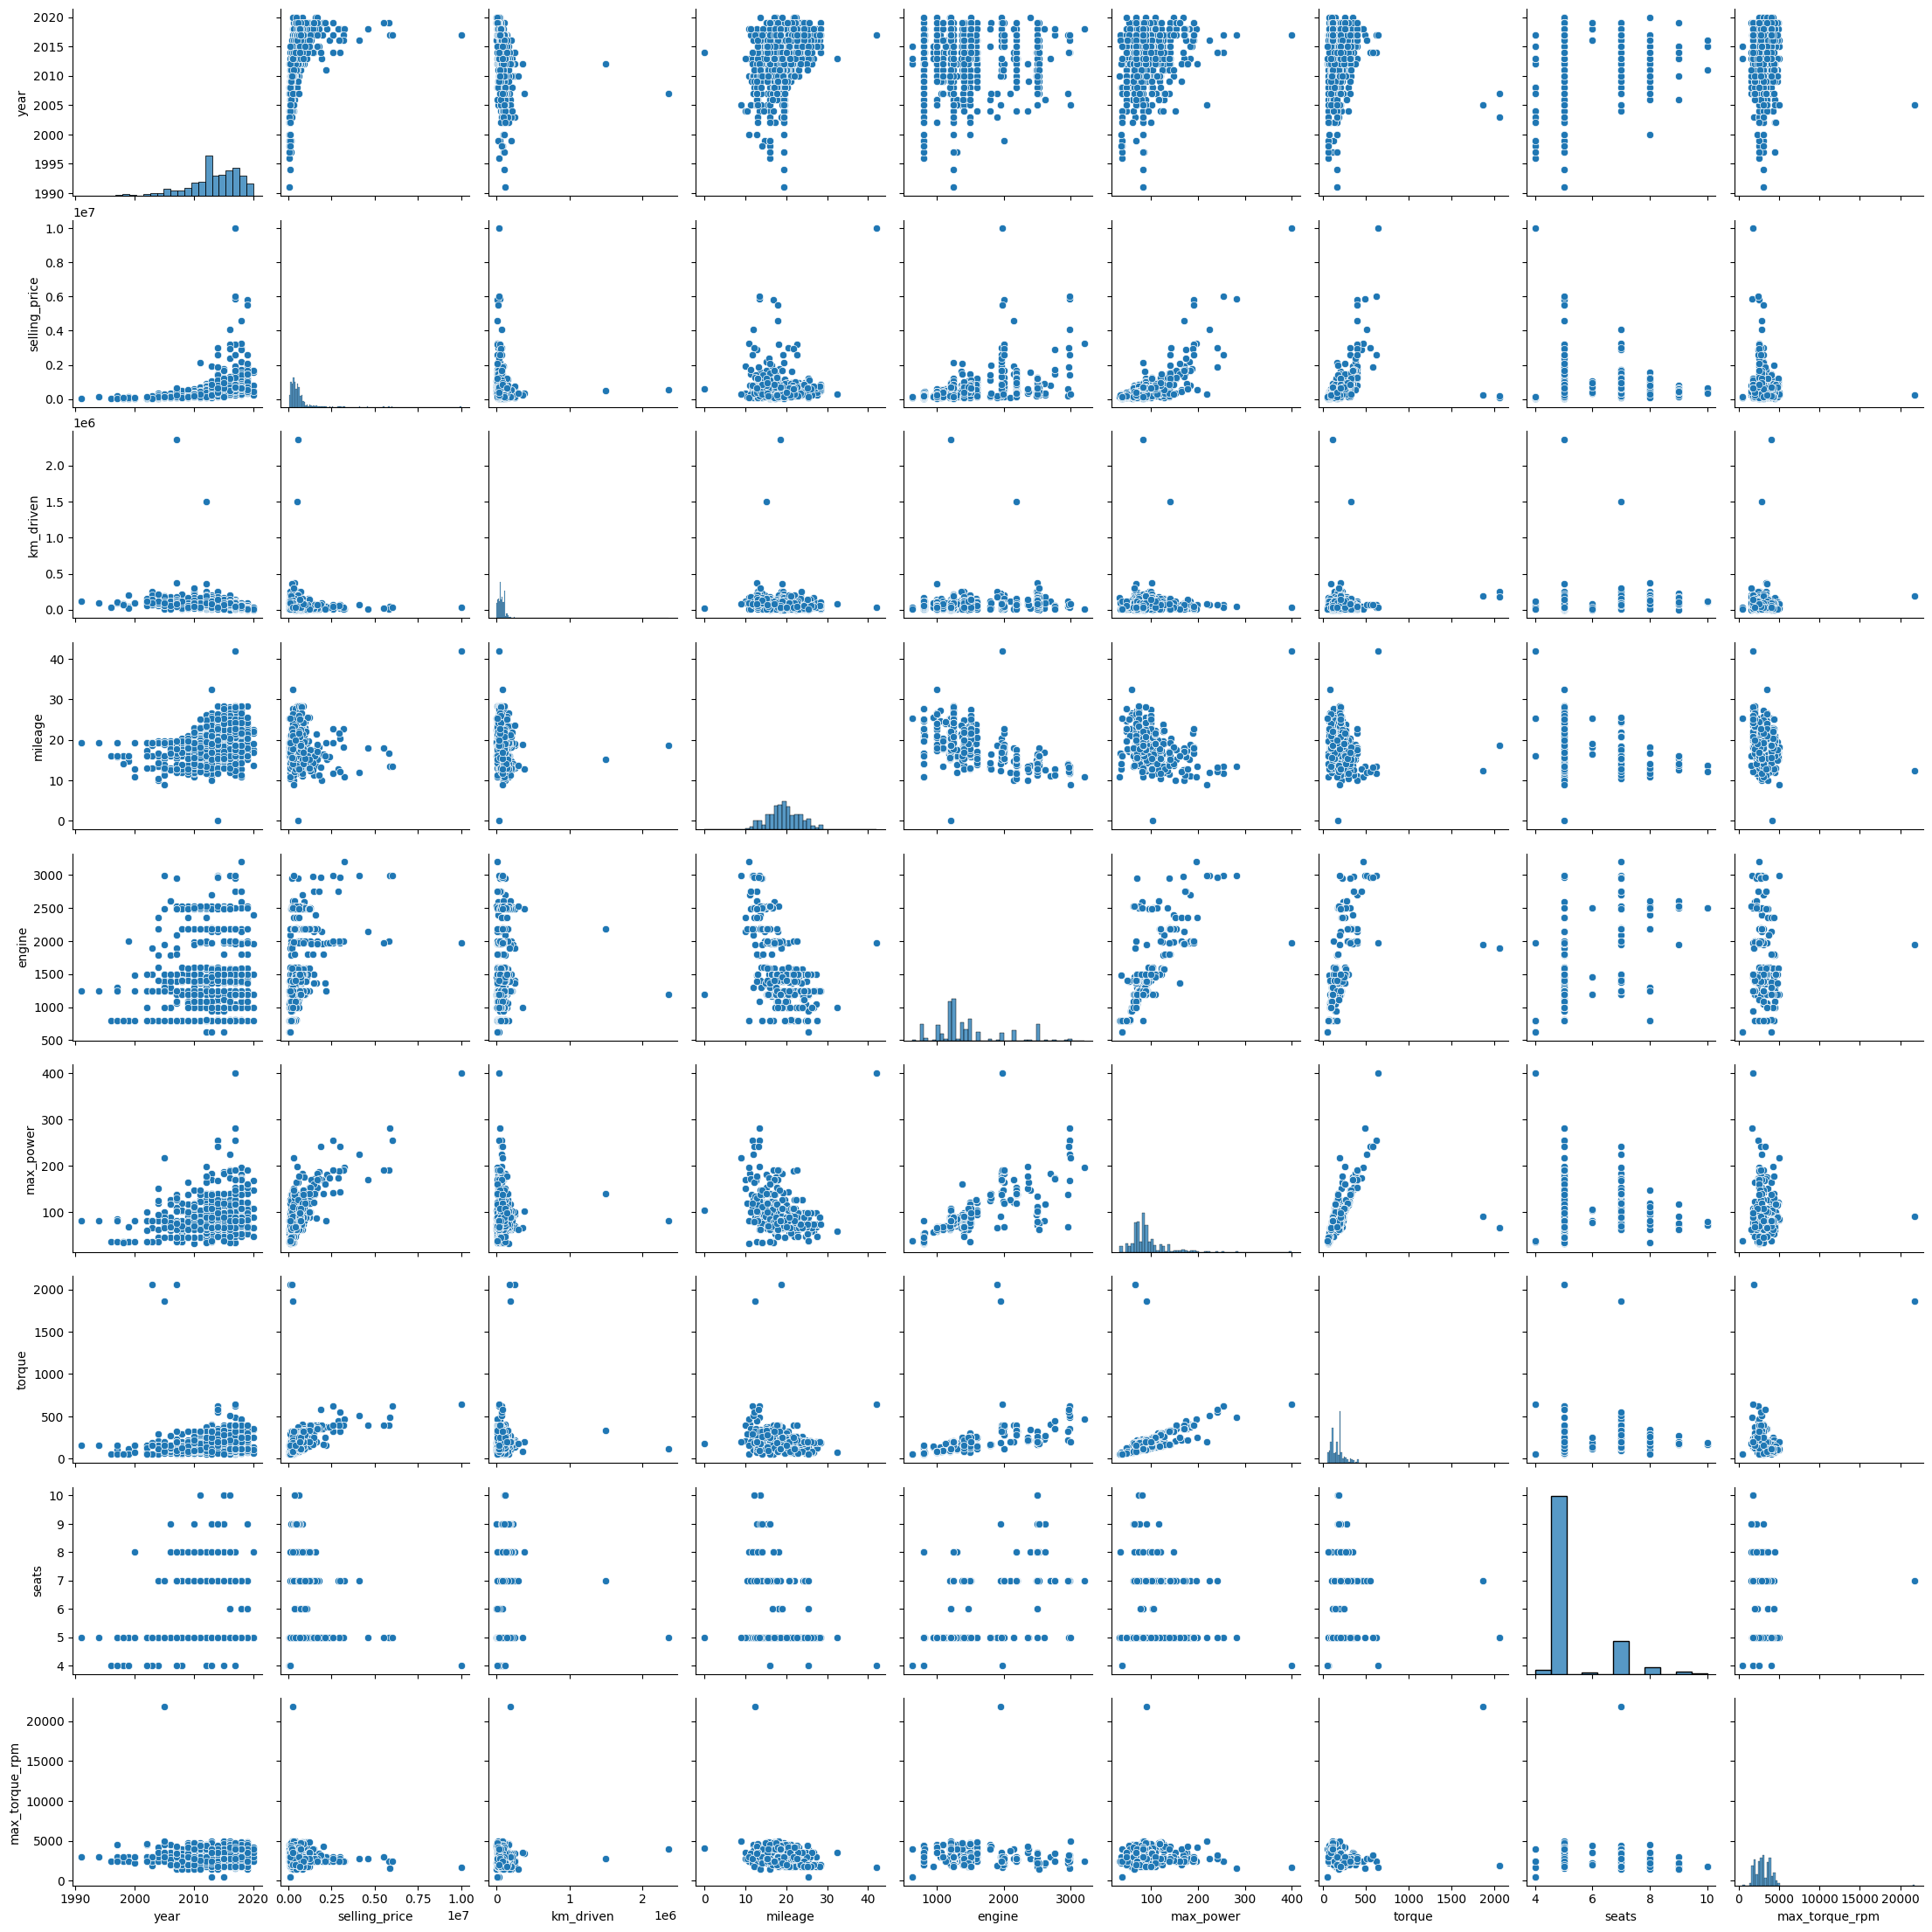

In [134]:
sns.pairplot(df_train.sample(1_000, random_state=RANDOM_STATE))

На построенном графике можно увидеть явную зависимость между целевой пременной `selling_price` и 
* признаком `year` (чем новее машина, тем больше цена).
* признаком `max_power` (чем больше лс, тем больше цена).
* признаком `torque` (чем больше крут. момент, тем больше цена).
* признаком `seats` (чем больше посадочных мест, тем меньше цена).

Также на графике можно увидеть сильноскоррелированные признаки:
* `max_power` и `torque`
* `max_power` и `engine`

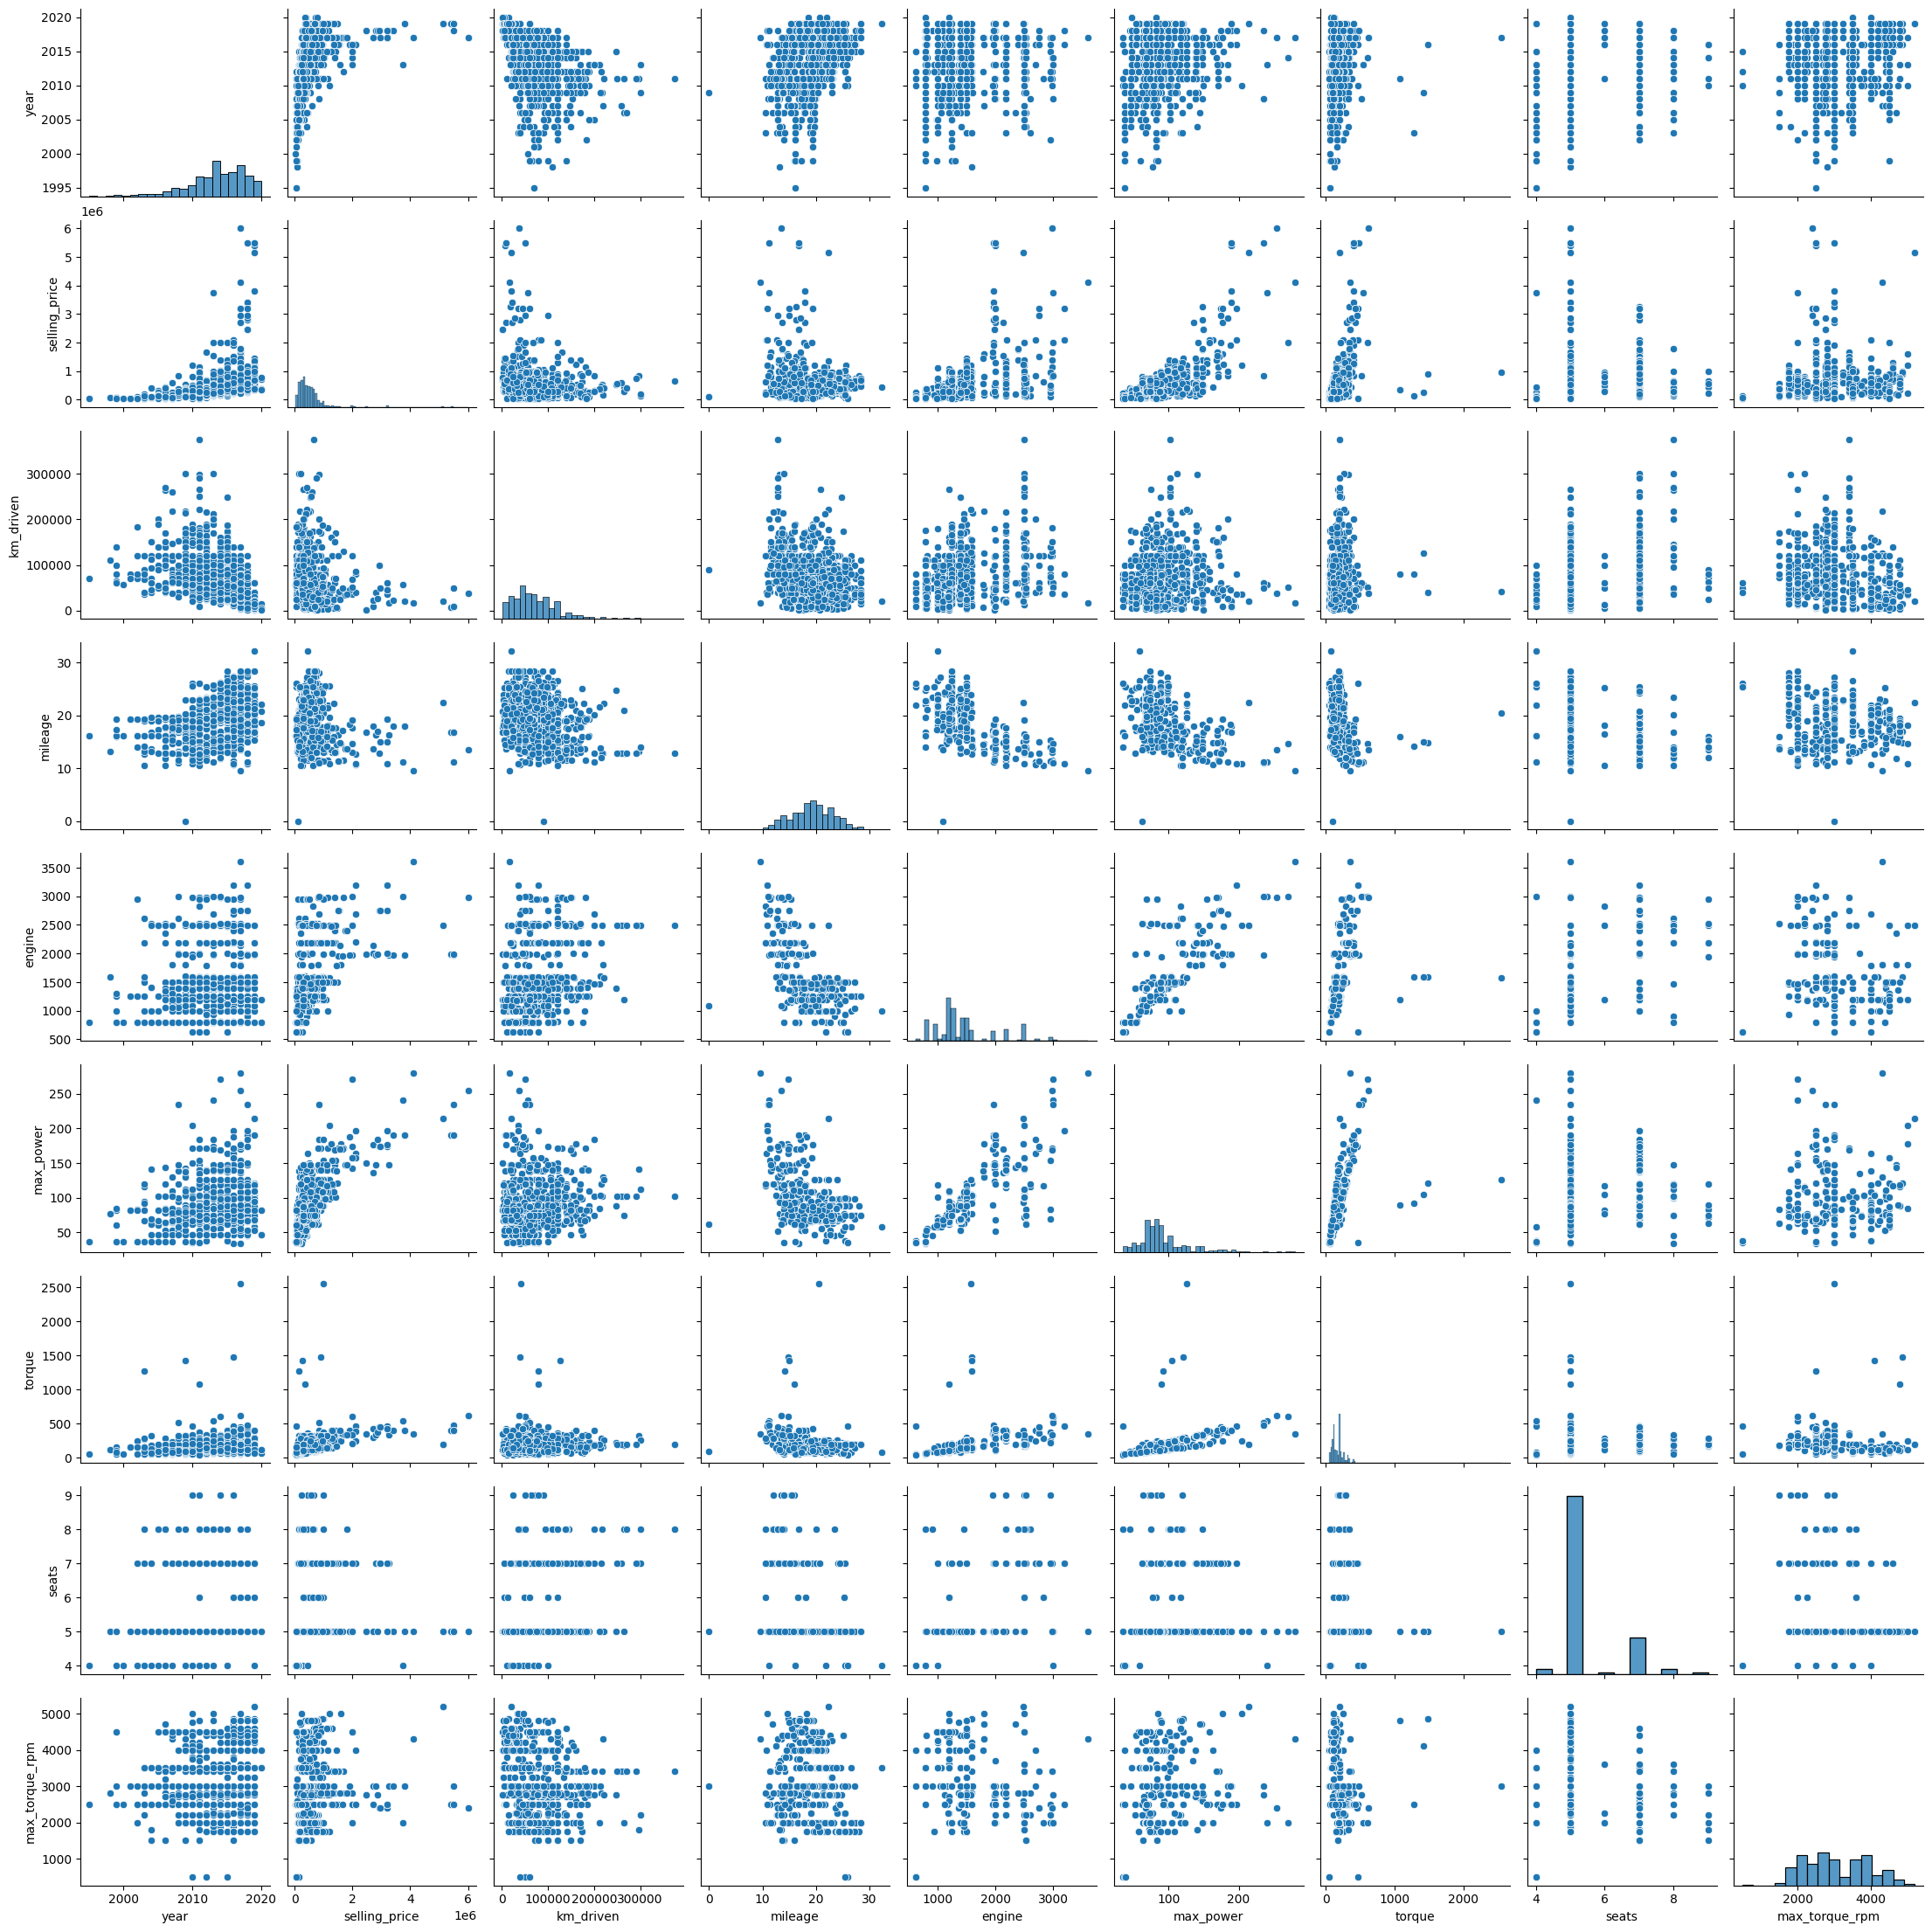

In [135]:
sns.pairplot(df_test.sample(1_000, random_state=RANDOM_STATE))

Распределения на тест и трейн выборке примерно совпадают.

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

<Axes: >

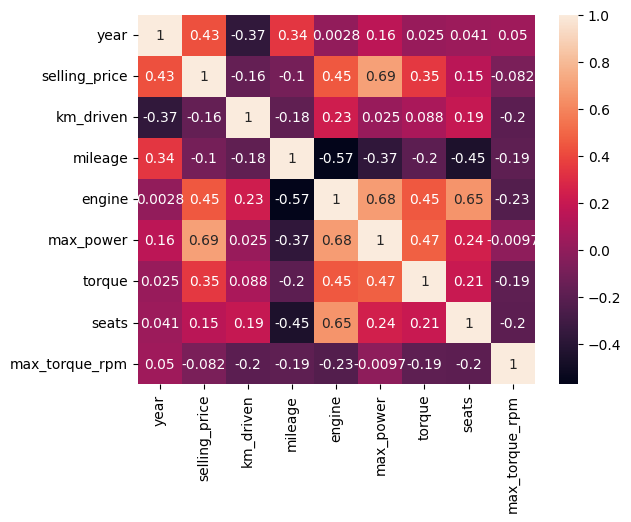

In [136]:
sns.heatmap(df_train.select_dtypes(include="number").corr(), annot=True)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Наименее скоррелированные признаки: `year` и `engine`.

Между признаками `max_power` и `selling_price` наблюдается наиболее сильная положительная линейная зависимость ( по определению корреляции)

Да, можно утверждать, что с уменьшением года, количество пройденных километров увеличивается, из-за негативной корреляции этих признаков $-0.37$.

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [137]:
def spearman_corr(data):
    # in essense, simple pearson correlation but on ranks
    
    # 1 - compute ranks
    ranks = data.select_dtypes(include="number").rank()
    
    # compupte correlation
    corr = ranks.corr()
    
    return corr

In [138]:
# our implementation
spearman_corr(df_train.select_dtypes(include="number"))

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
year,1.000000,0.707123,-0.569659,0.346132,-0.038056,0.165798,0.101714,0.048291,0.078423
selling_price,0.707123,1.000000,-0.295665,0.026186,0.463577,0.612258,0.580840,0.317605,-0.119402
km_driven,-0.569659,-0.295665,1.000000,-0.198466,0.304504,0.040919,0.242275,0.195317,-0.316573
mileage,0.346132,0.026186,-0.198466,1.000000,-0.429871,-0.308824,-0.161949,-0.435458,-0.183960
engine,-0.038056,0.463577,0.304504,-0.429871,1.000000,0.713113,0.841622,0.527716,-0.364073
max_power,0.165798,0.612258,0.040919,-0.308824,0.713113,1.000000,0.776903,0.304857,-0.017065
torque,0.101714,0.580840,0.242275,-0.161949,0.841622,0.776903,1.000000,0.435062,-0.517716
seats,0.048291,0.317605,0.195317,-0.435458,0.527716,0.304857,0.435062,1.000000,-0.190352
max_torque_rpm,0.078423,-0.119402,-0.316573,-0.183960,-0.364073,-0.017065,-0.517716,-0.190352,1.000000


In [139]:
# implementation in pandas
df_train.select_dtypes(include="number").corr(method="spearman")

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
year,1.000000,0.707123,-0.569659,0.346132,-0.038056,0.165798,0.101714,0.048291,0.078423
selling_price,0.707123,1.000000,-0.295665,0.026186,0.463577,0.612258,0.580840,0.317605,-0.119402
km_driven,-0.569659,-0.295665,1.000000,-0.198466,0.304504,0.040919,0.242275,0.195317,-0.316573
mileage,0.346132,0.026186,-0.198466,1.000000,-0.429871,-0.308824,-0.161949,-0.435458,-0.183960
engine,-0.038056,0.463577,0.304504,-0.429871,1.000000,0.713113,0.841622,0.527716,-0.364073
max_power,0.165798,0.612258,0.040919,-0.308824,0.713113,1.000000,0.776903,0.304857,-0.017065
torque,0.101714,0.580840,0.242275,-0.161949,0.841622,0.776903,1.000000,0.435062,-0.517716
seats,0.048291,0.317605,0.195317,-0.435458,0.527716,0.304857,0.435062,1.000000,-0.190352
max_torque_rpm,0.078423,-0.119402,-0.316573,-0.183960,-0.364073,-0.017065,-0.517716,-0.190352,1.000000


interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


/Users/ptrbelonovsky/python_venvs/defaualt_venv/lib/python3.10/site-packages/phik/phik.py:319: RuntimeWarning: invalid value encountered in sqrt
  global_correlations = np.sqrt(


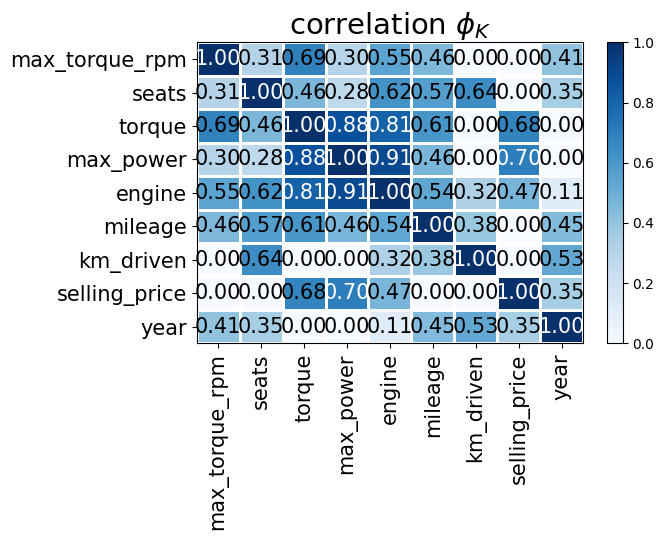

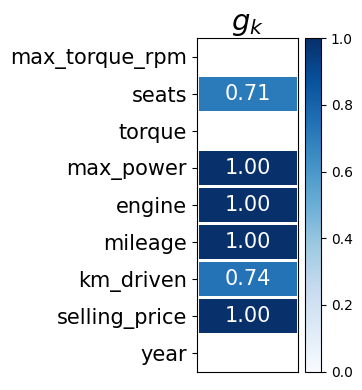

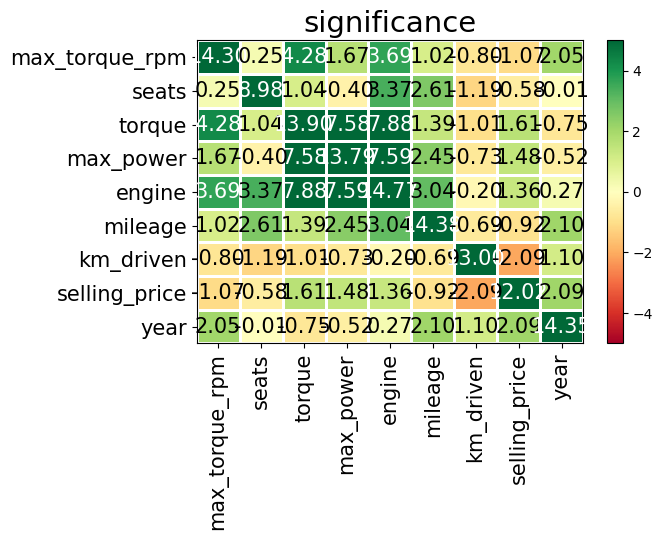

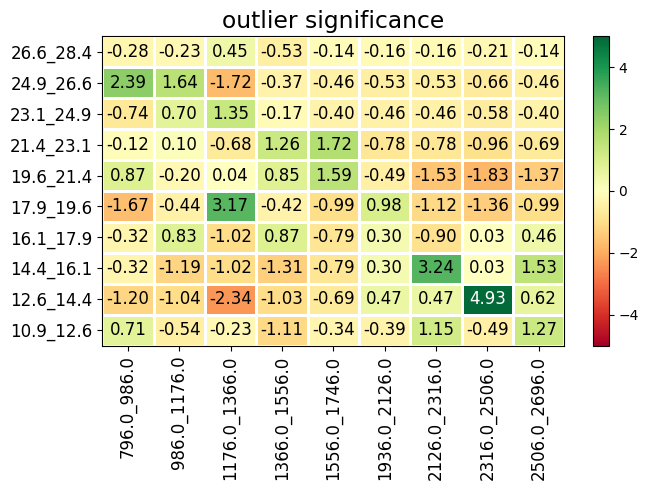

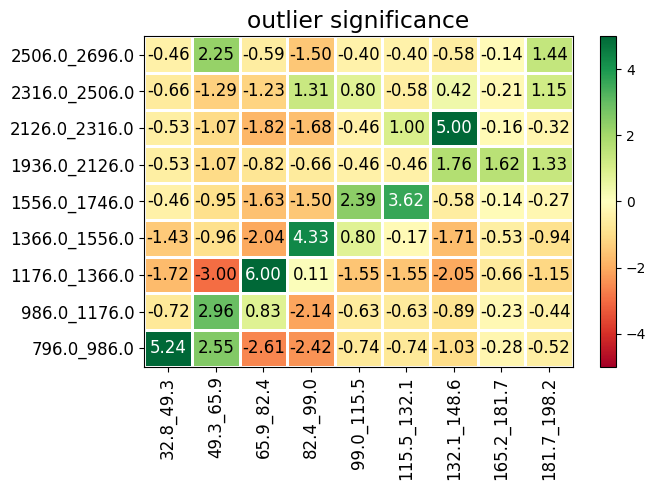

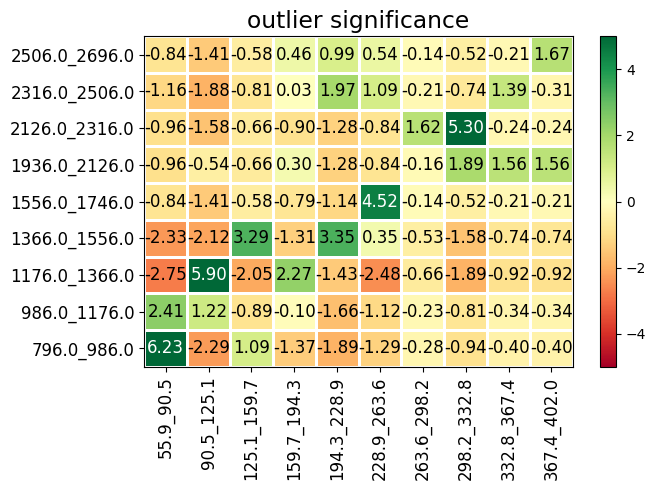

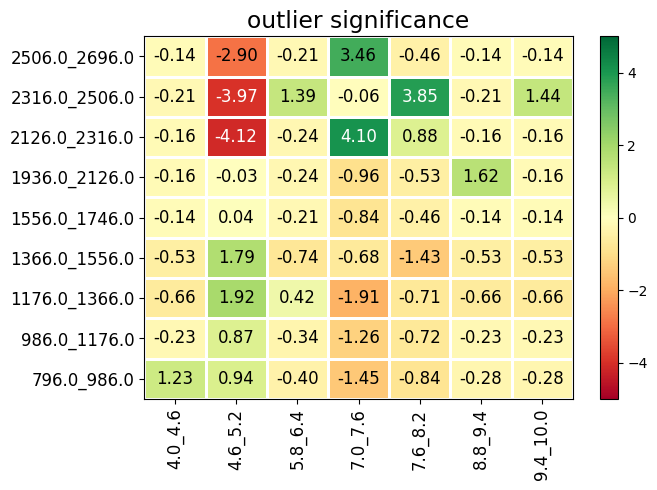

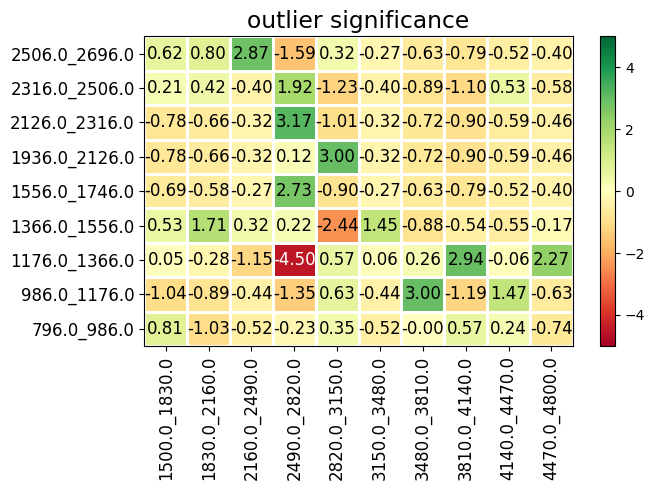

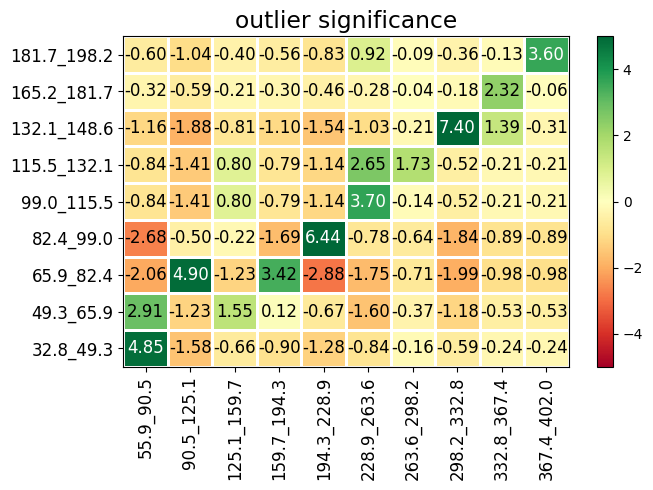

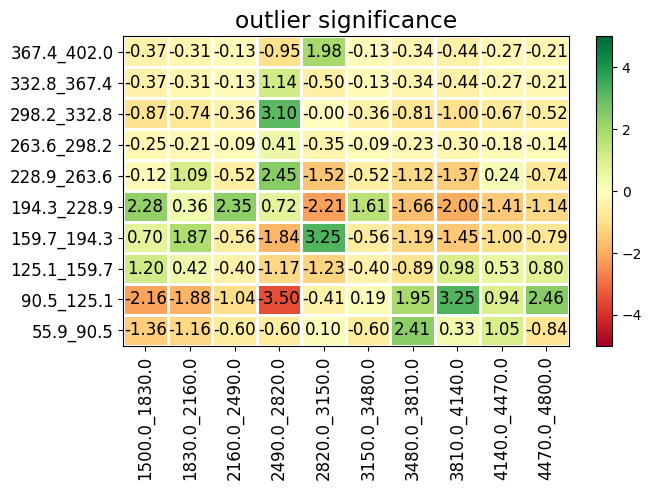

In [140]:
from phik import report
rep = report.correlation_report(df_train.select_dtypes(include="number").sample(100))

Интерпритация: $\phi_k$ корреляция показывает сильную зависимость между `selling_price` и `max_power`. Так же присутсвует большая корреляция между `enigine` и `max_power`. Если первое было понятно еще при подсчете корреляции Пирсона, то настолько большая зависимотсть между `enigine` и `max_power` выявлена только сейчас. Это свидетельствует о том, что зависимость между `enigine` и `max_power` нелинейна, в то время как между `selling_price` и `max_power` наоборот.

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Изобразим зависимости целевой переменной от категориальных признаков.

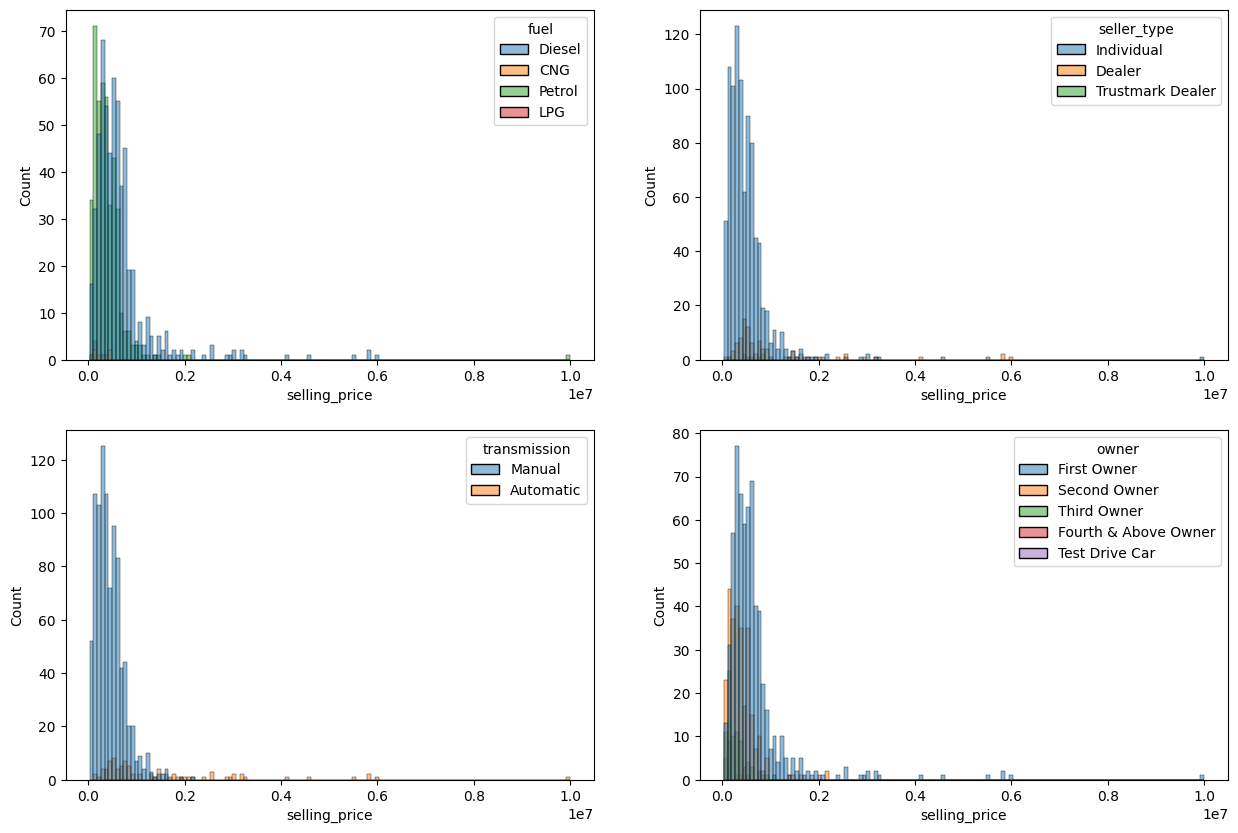

In [141]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for i, col in enumerate(["fuel", "seller_type", "transmission", "owner"]):
    sns.histplot(df_train.sample(1_000, random_state=RANDOM_STATE), x="selling_price", hue=col, ax=ax[i // 2][i % 2])

Выводы:
* Дизельные машины в основном стоят дороже, чем бензиновые.
* Машины с АКПП стоят дороже, чем машиныы с МКПП.
* Наиболее дорогие машины, которые продает первый владелец машины. Чем больше владельцев - тем меньше стоимость.

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

In [142]:
# для задания 24
from sklearn.metrics import mean_absolute_error
def weighted_mae(y_true, y_pred):
    weights = np.ones(y_true.shape[0])
    weights = np.where(y_pred < y_true, 0.5, weights)
    return mean_absolute_error(y_true, y_pred, sample_weight=weights)

In [143]:
res = []

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [144]:
from copy import deepcopy

In [145]:
target = "selling_price"
num_features = df_train.select_dtypes(include="number").columns.tolist()
num_features.remove(target)

In [146]:
y_train = deepcopy(df_train[target])
X_train = deepcopy(df_train[num_features])

In [147]:
assert X_train.shape == (5840, 8)

In [148]:
y_test = deepcopy(df_test[target])
X_test = deepcopy(df_test[num_features])

In [149]:
assert X_test.shape == (1000, 8)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [150]:
def print_results(y_true, y_pred, name):
    print(f"{name:<6}: R2={r2_score(y_true, y_pred):.3f}, MSE={MSE(y_true, y_pred):.3f}")

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print_results(y_train, y_pred_train, "Train")
print_results(y_test, y_pred_test, "Test")

res.append(["Model1", weighted_mae(y_test, y_pred_test)])

Train : R2=0.602, MSE=114147663963.531
Test  : R2=0.600, MSE=229927174161.925


Выводы:
* $R^2 = 0.6$ довольно хорошее значение метрики.
* MSE очень большой. Отчасти это из-за параметров самой целевой переменной.
* Модель сильно переобучается. MSE на тесте в 2 раза выше, чем на трейне.

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

$$R^2 = 1 - \frac{ESS}{TSS} =1 -  \frac{\sum (\hat{y} - y)^2}{\sum (\bar{y} - y)^2}$$
* $ESS$ - вариация в целевой переменной, *объясненная* нашей моделью.
* $TSS$ - полная вариация в целевой переменной.

In [152]:
def r2_score_manual(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_mean = np.mean(y_true)
    
    ESS = np.sum((y_pred - y_true)**2)
    TSS = np.sum((y_mean - y_true)**2)
    
    return 1 - ESS / TSS

In [153]:
r2_score_manual(y_train, y_pred_train)

0.6017711216947865

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [154]:
def adj_r2(y_true, y_pred, p):
    r2 = r2_score_manual(y_true, y_pred)
    N = len(y_true)
    
    return 1 - ((1 - r2) * (N - 1)) / (N - p - 1)

In [155]:
adj_r2(y_train, y_pred_train, p=X_train.shape[1])

0.6012247606887083

$\text{adjusted}-R^2$ применяется при сравнении моделей с разным количеством признаков, т.к простой $R^2$ всегда растет при увеличении количества признаков, независимо от качества предсказаний.

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [156]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.set_output(transform="pandas")

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

print_results(y_train, y_pred_train, "Train")
print_results(y_test, y_pred_test, "Test")

res.append(["Model + Scaler", weighted_mae(y_test, y_pred_test)])

Train : R2=0.602, MSE=114147663963.531
Test  : R2=0.600, MSE=229927174161.925


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [157]:
(pd.DataFrame()
 .assign(coef=model.coef_, feature=model.feature_names_in_)
 .sort_values(by="coef", key=np.abs, ascending=False))

,coef,feature
4,328401.496466,max_power
0,165824.592852,year
7,-58515.755576,max_torque_rpm
1,-48780.730799,km_driven
6,-28981.384403,seats
3,20127.633256,engine
5,15507.511307,torque
2,-8538.488373,mileage


Наиболее информативным оказался признак `max_power`.

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [158]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train_scaled, y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

print_results(y_train, y_pred_train, "Train")
print_results(y_test, y_pred_test, "Test")

res.append(["Lasso", weighted_mae(y_test, y_pred_test)])

Train : R2=0.602, MSE=114147663977.155
Test  : R2=0.600, MSE=229927909823.375


In [159]:
(pd.DataFrame()
 .assign(coef=model.coef_, feature=model.feature_names_in_)
 .sort_values(by="coef", key=np.abs, ascending=False))

,coef,feature
4,328402.685085,max_power
0,165822.400114,year
7,-58513.617413,max_torque_rpm
1,-48779.799149,km_driven
6,-28977.466974,seats
3,20125.616445,engine
5,15507.062294,torque
2,-8535.223062,mileage


L1 регуляризация не занулила никакие веса, т.к по дефолту установлен слишком маленький коеффициент регуляризации ($\alpha = 1$).

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [160]:
from sklearn.model_selection import GridSearchCV

model = Lasso()
param_grid = {"alpha": [0.5, 1, 10, 50, 100, 200, 1_000]}
gs = GridSearchCV(model, param_grid, cv=10, n_jobs=5, scoring="neg_mean_squared_error")
gs.fit(X_train_scaled, y_train)

y_pred_train = gs.predict(X_train_scaled)
y_pred_test = gs.predict(X_test_scaled)

print_results(y_train, y_pred_train, "Train")
print_results(y_test, y_pred_test, "Test")
res.append(["Lasso_best", weighted_mae(y_test, y_pred_test)])

Train : R2=0.602, MSE=114161681215.425
Test  : R2=0.599, MSE=230678003584.069


Грид серч обучил $7 \cdot 10 = 70$ моделей.

Перебирался параметр $\alpha$ - коэффициент регуляризации.

In [161]:
gs.best_params_

{'alpha': 1000}

In [162]:
(pd.DataFrame()
 .assign(coef=gs.best_estimator_.coef_, feature=gs.feature_names_in_)
 .sort_values(by="coef", key=np.abs, ascending=False))

,coef,feature
4,329574.751227,max_power
0,163539.077934,year
7,-56314.406551,max_torque_rpm
1,-47871.874914,km_driven
6,-25045.507219,seats
3,18238.873139,engine
5,15057.430571,torque
2,-5114.841282,mileage


Лучший параметр регляризации: $\alpha = 1000$.

Ни один из весов не занулился, но менее значимые признаки стали по модулю ближе к $0$.

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [163]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(random_state=RANDOM_STATE)
param_grid = {"alpha": [0.01, 0.05, 0.1, 0.5, 1, 10, 100], "l1_ratio": [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]}
gs = GridSearchCV(model, param_grid, cv=10, n_jobs=5, scoring="neg_mean_squared_error")
gs.fit(X_train_scaled, y_train)

y_pred_train = gs.predict(X_train_scaled)
y_pred_test = gs.predict(X_test_scaled)

print_results(y_train, y_pred_train, "Train")
print_results(y_test, y_pred_test, "Test")
res.append(["ElasticNet", weighted_mae(y_test, y_pred_test)])

Train : R2=0.602, MSE=114183384369.501
Test  : R2=0.597, MSE=231653562736.418


Грид серч обучил $7 \cdot 8 \cdot 10 = 560$ моделей.

In [164]:
gs.best_params_

{'alpha': 0.05, 'l1_ratio': 0.75}

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



Воспользуемся библиотекой PyTorch, чтобы реализовать данную регуляризацию.

In [165]:
import torch
from torch import nn
from torch import tensor
from torch.optim import Adam

from tqdm.auto import tqdm

class TorchL0LinearRegression(nn.Module):
    def __init__(self, input_dim, lambda_=1):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1) 
        self.lambda_ = lambda_
        
    def forward(self, x):
        return self.linear(x)
    
    def fit(self, X, y, n_iters=100, verbose=True):
        X = tensor(X.to_numpy(), dtype=torch.float32)
        y = tensor(y.to_numpy(), dtype=torch.float32)
        
        # scale the target
        self.target_mean = torch.mean(y)
        self.target_std = torch.std(y)
        
        y = (y - self.target_mean) / self.target_std
        
        mse_loss_func = nn.MSELoss()
        optimizer = Adam(self.parameters(), lr=0.1)
        
        for i in range(n_iters):
            y_pred = self(X)[:, 0]
            
            mse_loss = mse_loss_func(y, y_pred)
            l0_loss = self.lambda_ * sum((p != 0).float().sum() for p in model.parameters())
            loss = mse_loss + l0_loss
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if i % 10 == 0 and verbose:
                print(f"Epoch {i}: MSE Loss {mse_loss.item():.3f}, LO Loss {l0_loss.item():.3f}, Total Loss {loss.item():.3f}")
                
    @torch.no_grad
    def predict(self, X):
        X = tensor(X.to_numpy(), dtype=torch.float32)
        
        y_pred = (self(X)[:, 0] * self.target_std) + self.target_mean
        return np.array(y_pred)
            

In [166]:
model = TorchL0LinearRegression(X_train_scaled.shape[1], lambda_=3)
model.fit(X_train_scaled, y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

print()

print_results(y_train, y_pred_train, "Train")
print_results(y_test, y_pred_test, "Test")

res.append(["Model_L0", weighted_mae(y_test, y_pred_test)])

Epoch 0: MSE Loss 0.740, LO Loss 27.000, Total Loss 27.740
Epoch 10: MSE Loss 0.422, LO Loss 27.000, Total Loss 27.422
Epoch 20: MSE Loss 0.412, LO Loss 27.000, Total Loss 27.412
Epoch 30: MSE Loss 0.403, LO Loss 27.000, Total Loss 27.403
Epoch 40: MSE Loss 0.400, LO Loss 27.000, Total Loss 27.400
Epoch 50: MSE Loss 0.399, LO Loss 27.000, Total Loss 27.399
Epoch 60: MSE Loss 0.398, LO Loss 27.000, Total Loss 27.398
Epoch 70: MSE Loss 0.398, LO Loss 27.000, Total Loss 27.398
Epoch 80: MSE Loss 0.398, LO Loss 27.000, Total Loss 27.398
Epoch 90: MSE Loss 0.398, LO Loss 27.000, Total Loss 27.398

Train : R2=0.602, MSE=114148515087.069
Test  : R2=0.600, MSE=229824230583.874


  0%|          | 0/10 [00:00<?, ?it/s]

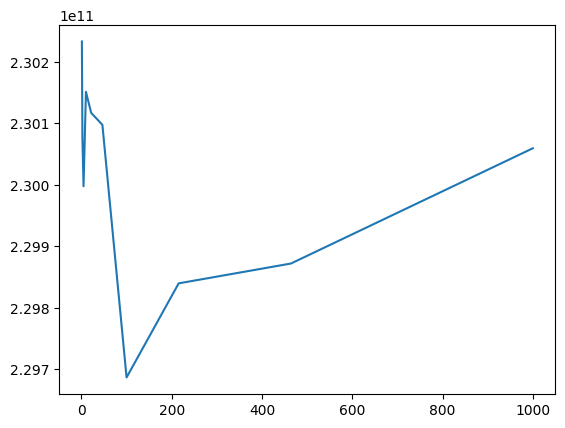

In [167]:
# experiments with reguralization coeff
lambdas = np.logspace(0, 3, num=10)
test_metrics = []

for lambda_ in tqdm(lambdas):
    model = TorchL0LinearRegression(X_train_scaled.shape[1], lambda_=lambda_)
    model.fit(X_train_scaled, y_train, verbose=False)
    
    y_pred_test = model.predict(X_test_scaled)
    test_metric = MSE(y_test, y_pred_test)
    test_metrics.append(test_metric)
    
fig, ax = plt.subplots()
ax.plot(lambdas, test_metrics)

In [168]:
print(f"Best lambda: {lambdas[np.argmin(test_metrics)]}")
print(f"Best test score: {np.min(test_metrics)}")

Best lambda: 100.0
Best test score: 229686781879.20715


**Выводы** Результаты получились немного лучше, однако полного зануления некоторых весов не произошло.

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

Достанем только название марки машины из `name`.

In [169]:
df_train["name"] = df_train.name.str.split(" ").str[0]
df_test["name"] = df_test.name.str.split(" ").str[0]

In [170]:
df_train["name"].value_counts()

name
Maruti           1804
Hyundai          1058
Mahindra          611
Tata              534
Toyota            309
Ford              308
Honda             308
Chevrolet         188
Renault           171
Volkswagen        153
Nissan             63
Skoda              61
Datsun             49
Mercedes-Benz      44
BMW                41
Fiat               39
Audi               31
Jeep               20
Mitsubishi          8
Volvo               8
Jaguar              7
Force               4
Isuzu               4
Land                3
MG                  3
Daewoo              3
Kia                 3
Ambassador          3
Lexus               1
Peugeot             1
Name: count, dtype: int64

In [171]:
cat_features = df_train.select_dtypes(include="object").columns.tolist() + ["seats"]
num_features.remove("seats")

In [172]:
X_train_cat = deepcopy(df_train[num_features + cat_features])
X_test_cat = deepcopy(df_test[num_features + cat_features])

In [173]:
assert X_train_cat.shape == (5840, 13)

In [174]:
X_train_cat.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,30,4,3,2,5
top,Maruti,Diesel,Individual,Manual,First Owner
freq,1804,3177,5223,5336,3603


### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [175]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(
    [("scaling", StandardScaler(), num_features),
    ("ohe", OneHotEncoder(sparse_output=False, handle_unknown="infrequent_if_exist", drop="first"), cat_features)]
)
ct.set_output(transform="pandas")

X_train_cat = ct.fit_transform(X_train_cat)
X_test_cat = ct.transform(X_test_cat)

/Users/ptrbelonovsky/python_venvs/defaualt_venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

* OHE необходимо использовать, если количество категорий небольшое, иначе мы получим очень много фичей.
* Один столбец, именуемый базовым, удаляется специально, чтобы избежать мультиколлинеарности. 
* Нет, такие признаки не корректно удалять, т.к мы сломаем связь между категориями. Однако мы можем определить не значемые категории в одну.

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [176]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

model = Ridge()
param_grid = {"alpha": [0.5, 1, 10, 50, 100, 200, 1_000]}
gs = GridSearchCV(model, param_grid, cv=10, n_jobs=5, scoring="r2")
gs.fit(X_train_cat, y_train)

y_pred_train = gs.predict(X_train_cat)
y_pred_test = gs.predict(X_test_cat)

print_results(y_train, y_pred_train, "Train")
print_results(y_test, y_pred_test, "Test")

res.append(["Model_Ridge_cat", weighted_mae(y_test, y_pred_test)])

Train : R2=0.772, MSE=65323073604.283
Test  : R2=0.782, MSE=125278012537.452


In [177]:
gs.best_params_

{'alpha': 1}

**Метрики сильно выросли!!!!**

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

#### Отлагорифмируем таргет

In [178]:
y_train_log = np.log(y_train)

Text(0.5, 1.0, 'Log target')

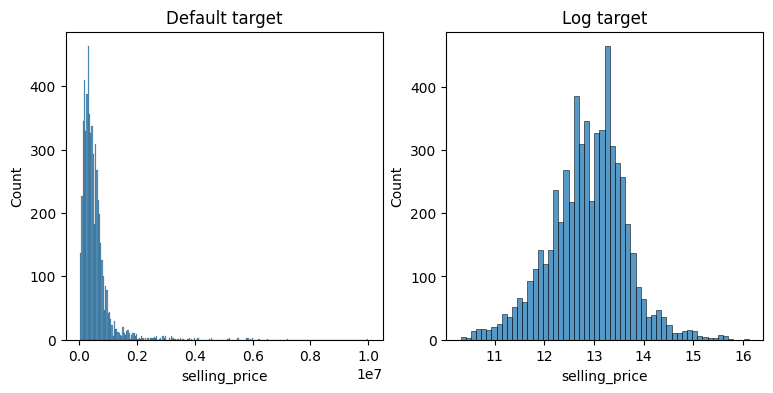

In [179]:
fig, ax = plt.subplots(ncols=2, figsize=(9, 4))

sns.histplot(y_train, ax=ax[0])
ax[0].set_title("Default target")

sns.histplot(y_train_log, ax=ax[1])
ax[1].set_title("Log target")

In [180]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

model = Ridge()
param_grid = {"alpha": [0.5, 1, 10, 50, 100, 200, 1_000]}
gs = GridSearchCV(model, param_grid, cv=10, n_jobs=5, scoring="r2")
gs.fit(X_train_cat, y_train_log)

y_pred_train = np.exp(gs.predict(X_train_cat))
y_pred_test = np.exp(gs.predict(X_test_cat))

print_results(y_train, y_pred_train, "Train")
print_results(y_test, y_pred_test, "Test")

res.append(["Model_Ridge_log_target", weighted_mae(y_test, y_pred_test)])

Train : R2=0.895, MSE=30210353133.641
Test  : R2=0.911, MSE=51270596360.606


**ЕМАЕ КУДА ТАК ГОНИШЬ БРАТ??**

Метрики супер выросли!

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [181]:
def business_metrics(y_true, y_pred):
    n = y_true.shape[0]
    
    perc_diff = (y_true - y_pred) / y_true
    n_correct = len(np.where((perc_diff >= -0.1) & (perc_diff <= 0.1))[0])
    
    return n_correct / n
    


business_metrics(y_test, y_pred_test)

0.355

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



Будем использовать взвешенный MAE. Семплы с недопрогнозом будут иметь в 2 раза больший вес чем семплы с перепрогнозом.

In [183]:
from sklearn.metrics import mean_absolute_error
def weighted_mae(y_true, y_pred):
    weights = np.ones(y_true.shape[0])
    weights = np.where(y_pred < y_true, 0.5, weights)
    return mean_absolute_error(y_true, y_pred, sample_weight=weights)

,Model,weighted_mae
0,Model1,202376.150155
1,Model + Scaler,202376.150155
2,Lasso,202375.804069
3,Lasso_best,201777.216114
4,ElasticNet,200722.173242
5,Model_L0,202236.099559
6,Model_Ridge_cat,155655.640778
7,Model_Ridge_log_target,101169.009439


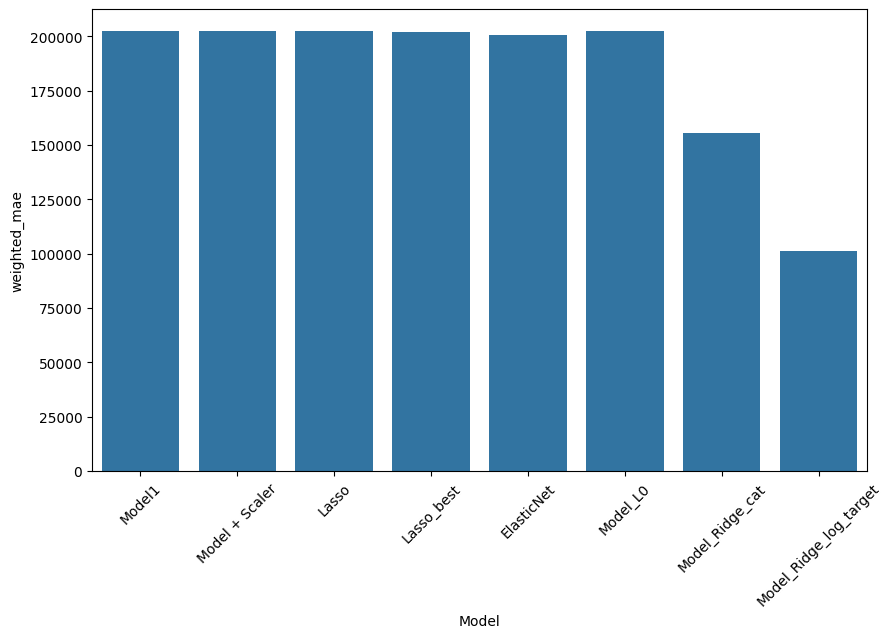

In [192]:
fig, ax = plt.subplots(figsize=(10, 6))
res = pd.DataFrame(res, columns=["Model", "weighted_mae"])
display(res)
sns.barplot(res, x="Model", y="weighted_mae", ax=ax)
plt.xticks(rotation=45)

pass

Лучше всего бизнес задачу решает модель обученная численных + катеориальных фичах и с логорифмированным таргетом.

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

##### Создадим Pipeline со всеми предобработками
Это позволит нам максимально просто и быстро предобрабатывать данные для предсказаний

In [193]:
from feature_processing_basic import FeaturePreprocessorBasic
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [194]:
!cat feature_processing_basic.py

import re
from copy import deepcopy

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
import numpy as np


class FeaturePreprocessorBasic(BaseEstimator, TransformerMixin):
    def __init__(self):
        return

    def fit(self, X, y=None):

        X = deepcopy(X)
        X["mileage"] = X["mileage"].str.split(" ").str[0].astype(float)
        X["engine"] = X["engine"].str.split(" ").str[0].astype(float)
        X["max_power"] = (
            X["max_power"].str.split(" ").str[0].replace("", None).astype(float)
        )

        X["max_torque_rpm"] = X["torque"].apply(self.find_max_torque_rpm)
        X["torque"] = X["torque"].apply(self.find_torque)

        self.cols_with_nans = X.columns[X.isna().any(axis=0)].tolist()
        self.imp = SimpleImputer(strategy="median")
        self.imp.fit(X[self.cols_with_nans])
        self.imp.set_output(transform="pandas")

        return self

    @staticmethod
    def find_torque(value):

     

In [195]:
num_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']
cat_features = ['name', 'fuel', 'seller_type', 'transmission', 'owner', "seats"]

ct = ColumnTransformer(
    [("scaler", StandardScaler(), num_features),
     ("one_hot", OneHotEncoder(sparse_output=False,
                               handle_unknown="infrequent_if_exist", drop="first"), cat_features)
    ], n_jobs=2
)

feature_pipeline = Pipeline(
    [("basic", FeaturePreprocessorBasic()),
    ("column_transformer", ct)], verbose=False
)
feature_pipeline.set_output(transform="pandas")

Pipeline(steps=[('basic', FeaturePreprocessorBasic()),
                ('column_transformer',
                 ColumnTransformer(n_jobs=2,
                                   transformers=[('scaler', StandardScaler(),
                                                  ['year', 'km_driven',
                                                   'mileage', 'engine',
                                                   'max_power', 'torque',
                                                   'max_torque_rpm']),
                                                 ('one_hot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist',
                                                                sparse_output=False),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission', 'owner',
                                                   'seats'])]))])

In [196]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

feature_names = df_train.columns.tolist()
feature_names.remove("selling_price")
df_train = df_train.drop_duplicates(subset=feature_names, keep="first").reset_index(drop=True)

In [197]:
X_train_final, y_train_final = feature_pipeline.fit_transform(df_train), df_train["selling_price"]

In [198]:
X_test_final, y_test_final = feature_pipeline.transform(df_test), df_test["selling_price"]

/Users/ptrbelonovsky/python_venvs/defaualt_venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


##### Обучим лучшую модель

In [200]:
model = Ridge(alpha=0.5)
model.fit(X_train_final, np.log(y_train_final))

y_pred_train = np.exp(model.predict(X_train_final))
y_pred_test = np.exp(model.predict(X_test_final))

print_results(y_train, y_pred_train, "Train")
print_results(y_test, y_pred_test, "Test")

Train : R2=0.895, MSE=30210353133.641
Test  : R2=0.911, MSE=51270596360.606


###### Cохраним предобработки и модель

In [201]:
!mkdir data 

mkdir: data: File exists


In [202]:
import joblib

joblib.dump(feature_pipeline, "data/preproc.joblib")
joblib.dump(model, "data/model.joblib")

['data/model.joblib']

### Протестируем сервис

#### Код сервиса:

In [204]:
!cat main.py

from fastapi import FastAPI, UploadFile, File, HTTPException, Depends
from fastapi.responses import StreamingResponse
from pydantic import BaseModel, ValidationError, field_validator, Field
from typing import List, Optional, Union
import csv
from io import StringIO

import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge

from feature_processing_basic import FeaturePreprocessorBasic

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: Union[str, float] = Field(np.nan)
    engine: Union[str, float] = Field(np.nan)
    max_power: Union[str, float] = Field(np.nan)
    torque: Union[str, float] = Field(np.nan)
    seats: Union[float] = Field(np.nan)

    @field_validator("*", mode="before")
    def ignore_empty_strings(cls, value):
        if isinsta

#### POST `predict_item`

In [205]:
import json
import requests
obs = json.loads(df_train.loc[0].to_json())
obs = json.dumps(obs)
obs

'{"name": "Maruti Swift Dzire VDI", "year": 2014, "selling_price": 450000, "km_driven": 145500, "fuel": "Diesel", "seller_type": "Individual", "transmission": "Manual", "owner": "First Owner", "mileage": "23.4 kmpl", "engine": "1248 CC", "max_power": "74 bhp", "torque": "190Nm@ 2000rpm", "seats": 5.0}'

In [206]:
resp = requests.post("http://127.0.0.1:8000/predict_item", data=obs)
resp

<Response [200]>

In [207]:
resp.text

'429231.28898637235'

In [209]:
np.exp(model.predict(X_train_final.loc[[0]]))

array([429231.28898637])

**:)**. Работает!

#### POST `predict_items`

In [210]:
from io import BytesIO
with open("cars_test.csv", "r") as f:
    files = {'file': f}
    resp = requests.post("http://127.0.0.1:8000/predict_items", files=files)
resp

<Response [200]>

In [211]:
pd.read_csv(BytesIO(resp.content))

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,pred
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0,439565.926332
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0,543658.573240
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0,286196.742383
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0,602949.366266
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0,126753.633090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0,145114.620006
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0,442929.339326
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,289310.876068
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0,276608.764202


In [212]:
pd.read_csv(BytesIO(resp.content))["pred"]

0      439565.926332
1      543658.573240
2      286196.742383
3      602949.366266
4      126753.633090
           ...      
995    145114.620006
996    442929.339326
997    289310.876068
998    276608.764202
999    688858.994562
Name: pred, Length: 1000, dtype: float64

In [213]:
pd.Series(y_pred_test)

0      439565.926332
1      543658.573240
2      286196.742383
3      602949.366266
4      126753.633090
           ...      
995    145114.620006
996    442929.339326
997    289310.876068
998    276608.764202
999    688858.994562
Length: 1000, dtype: float64

**:)**. Работает!

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>